In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms

from typing import List, Tuple
from PIL import Image

from torch import nn
from torchvision import transforms
from helper_functions import set_seeds
import warnings
warnings.filterwarnings("ignore")


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
def pred_accuracy(
    model: torch.nn.Module,
    class_names: List[str],
    image_path: str,
    image_size: Tuple[int, int] = (224, 224),
    transform: torchvision.transforms = None,
    device: torch.device = device,
):

    # Open image
    img = Image.open(image_path)

    # Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose(
            [
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    model.to(device)

    model.eval()
    with torch.inference_mode():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # Predict image 
    return(class_names[target_image_pred_label])

label_1


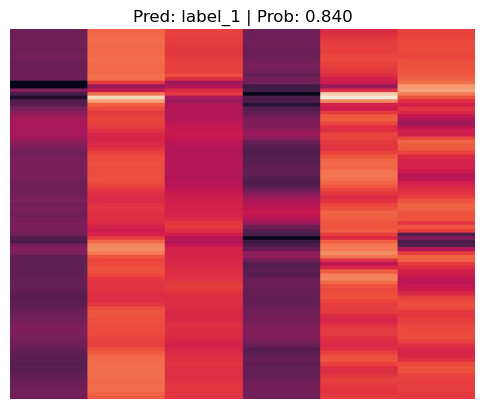

In [6]:
import requests
from going_modular.predictions import pred_and_plot_image
class_names = ['label_1','label_3','label_4','label_5','label_6','label_7','label_8']
custom_image_path = "504_heatmap_0.jpg"
the_model = torch.load("50_epoch_VIT_large_model.pt")
pred_and_plot_image(model=the_model,
                    image_path=custom_image_path,
                    class_names=class_names)
print(pred_accuracy(model=the_model,
                    image_path=custom_image_path,
                    class_names=class_names))


In [4]:
import os

image_dir = "seperated_heatmap_data//test//"
total_images=total_pred_c=0

class_names = ['label_1','label_3','label_4','label_5','label_6','label_7','label_8']
the_model = torch.load("30_epoch_VIT_base_model.pt")


for categories in os.listdir(image_dir):
    img_list = os.listdir(image_dir+categories)
    individual_pred_c=0
    for i,img_name in enumerate(img_list):
        total_images+=1
        #print(image_dir + categories+"\\" + img_name)
        if pred_accuracy(model=the_model,image_path=image_dir + categories+"\\" + img_name,class_names=class_names)==categories:   
            individual_pred_c+=1
            total_pred_c+=1   

    print("Accuracy of detecting "+categories+" is :"+str(individual_pred_c/len(img_list)))   
print("\n Accuracy of detecting all test images is :"+str(total_pred_c/total_images))    

Accuracy of detecting label_1 is :0.9754299754299754
Accuracy of detecting label_3 is :0.9066265060240963
Accuracy of detecting label_4 is :0.9853801169590644
Accuracy of detecting label_5 is :0.08366533864541832
Accuracy of detecting label_6 is :0.9079365079365079
Accuracy of detecting label_7 is :0.9917808219178083
Accuracy of detecting label_8 is :0.8794788273615635

 Accuracy of detecting all test images is :0.851228978007762
